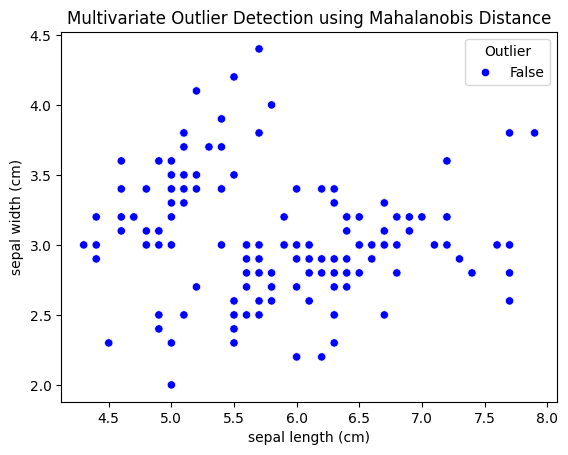

In [ ]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.

import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Load example data (Iris without categorical column)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Calculate Mahalanobis distance
def mahalanobis_distance(x, data, cov):
    x_mu = x - data.mean().values
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

cov_matrix = np.cov(df.values.T)
df['Mahalanobis_D'] = mahalanobis_distance(df, df, cov_matrix)

# Determine cutoff (Chi-squared distribution)
threshold = chi2.ppf(0.99, df=df.shape[1] - 1)  # 99% confidence
df['Outlier'] = df['Mahalanobis_D'] > threshold

# Plotting
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="Outlier", palette={True: "red", False: "blue"})
plt.title("Multivariate Outlier Detection using Mahalanobis Distance")
plt.show()


